In [100]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# load inflow dataset into dataframe
inflow_data = pd.read_excel("InflowData_1.xlsx")

# make list with dma names
dma_list = list(inflow_data.columns.values[1:])

# male list with dma description
dma_descripton = ["Hospital district",
                   "Residential district in the countryside",
                   "Residential district in the countryside",
                   "Suburban residential/commercial district",
                   "Residential/commercial district close to the city centre",
                   "Suburban district including sport facilities and office buildings",
                   "Residential district close to the city centre",
                   "City centre district",
                   "Commercial/industrial district close to the port",
                   "Commercial/industrial district close to the port"]

# make list with information of users supplied
users_supplied = [162,531,607,2094,7955,1135,3180,2901,425,776]

# make list with average net inflow
av_net_inflo = [8.4,9.6,4.3,32.9,78.3,8.1,25.1,20.8,20.6,26.4]

# change index of inflow dataframe to time step
inflow_data = inflow_data.set_index('Date-time CET-CEST (DD/MM/YYYY HH:mm)')

# change index format to datetime
inflow_data.index = pd.to_datetime(inflow_data.index, format="%d/%m/%Y %H:%M")

# print first two rows
inflow_data.head(3)

,DMA A (L/s),DMA B (L/s),DMA C (L/s),DMA D (L/s),DMA E (L/s),DMA F (L/s),DMA G (L/s),DMA H (L/s),DMA I (L/s),DMA J (L/s)
Date-time CET-CEST (DD/MM/YYYY HH:mm),,,,,,,,,,
2021-01-01 00:00:00,NaN,NaN,3.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,NaN,NaN,3.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,NaN,NaN,3.2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN


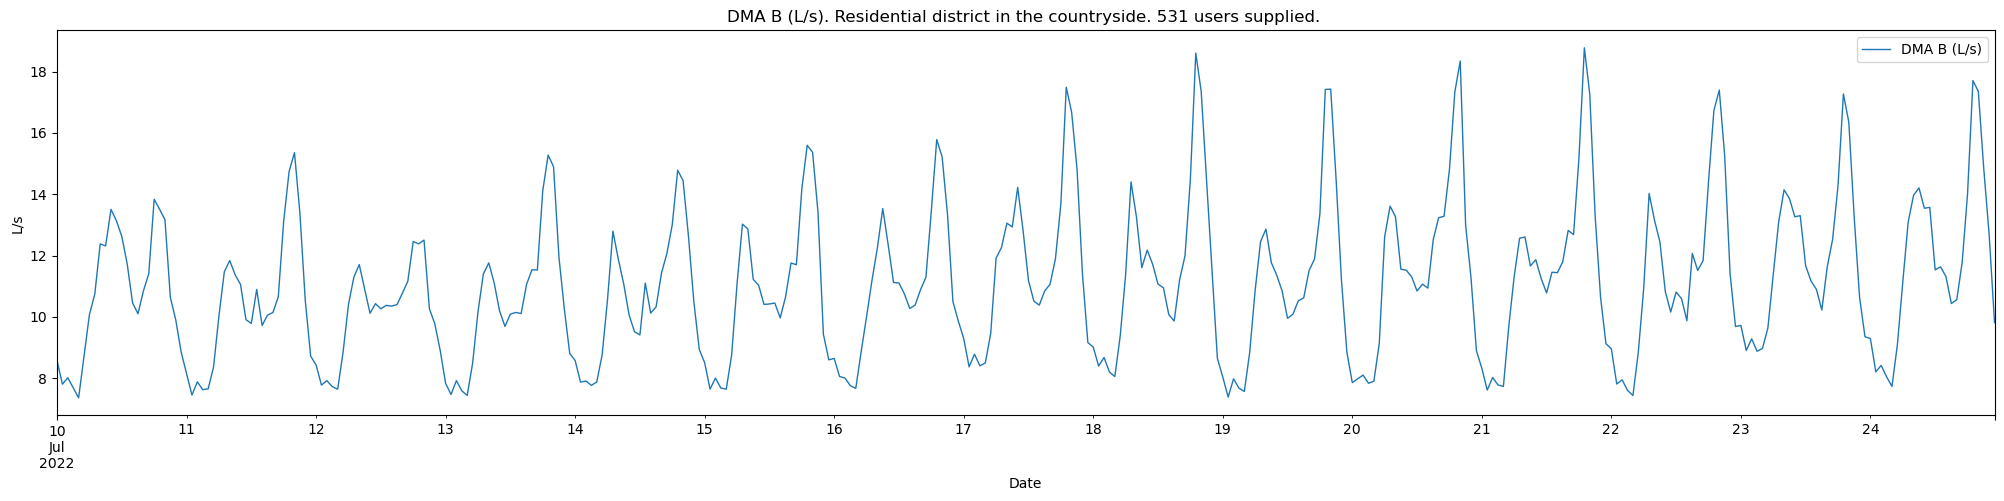

In [102]:
# define start and end dates for analysis
start = '2022-07-10'
end = '2022-07-24'

# plot time series for start and end dates
i = 1
fig, ax = plt.subplots()
inflow_data[start:end].plot(y=dma_list[i],use_index=True,ax = ax,figsize=(25,5), linewidth=1)
plt.title(dma_list[i] + ". " + dma_descripton[i] +". "+ str(users_supplied[i]) + " users supplied. ")
plt.xlabel("Date")
plt.ylabel("L/s")
plt.show()

In [103]:
# weather data
weather_data = pd.read_excel("WeatherData_1.xlsx")

# change index of weather dataframe to time step
weather_data = weather_data.set_index('Date-time CET-CEST (DD/MM/YYYY HH:mm)')

# change index format to datetime
weather_data.index = pd.to_datetime(weather_data.index, format="%d/%m/%Y %H:%M")

In [104]:
weather_data

,Rainfall depth (mm),Air temperature (°C),Air humidity (%),Windspeed (km/h)
Date-time CET-CEST (DD/MM/YYYY HH:mm),,,,
2021-01-01 00:00:00,0.0,7.2,79.0,9.0
2021-01-01 01:00:00,0.0,7.3,79.0,6.0
2021-01-01 02:00:00,0.0,7.6,78.0,4.0
2021-01-01 03:00:00,0.0,8.2,75.0,4.0
2021-01-01 04:00:00,0.0,7.7,77.0,7.0
...,...,...,...,...
2022-07-31 19:00:00,0.0,26.6,68.0,5.0
2022-07-31 20:00:00,0.0,26.8,65.0,6.0
2022-07-31 21:00:00,0.0,26.7,65.0,5.0


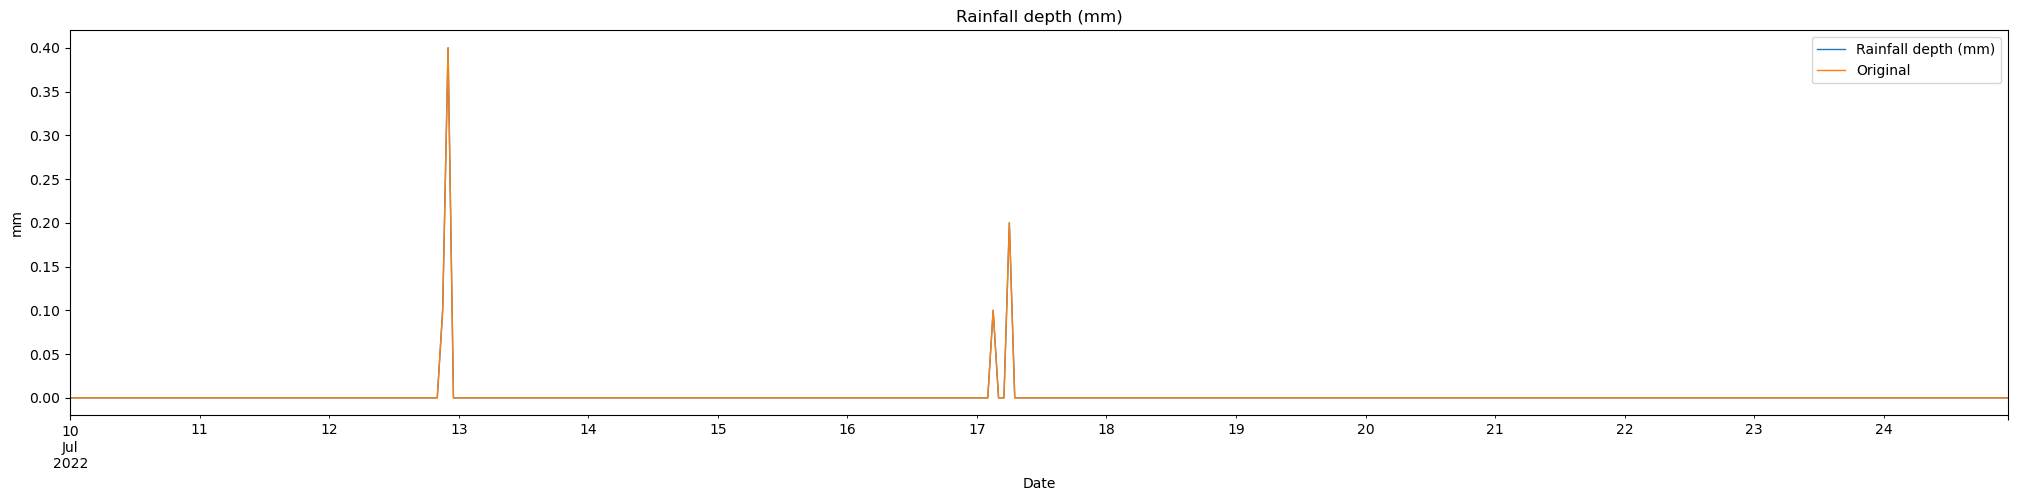

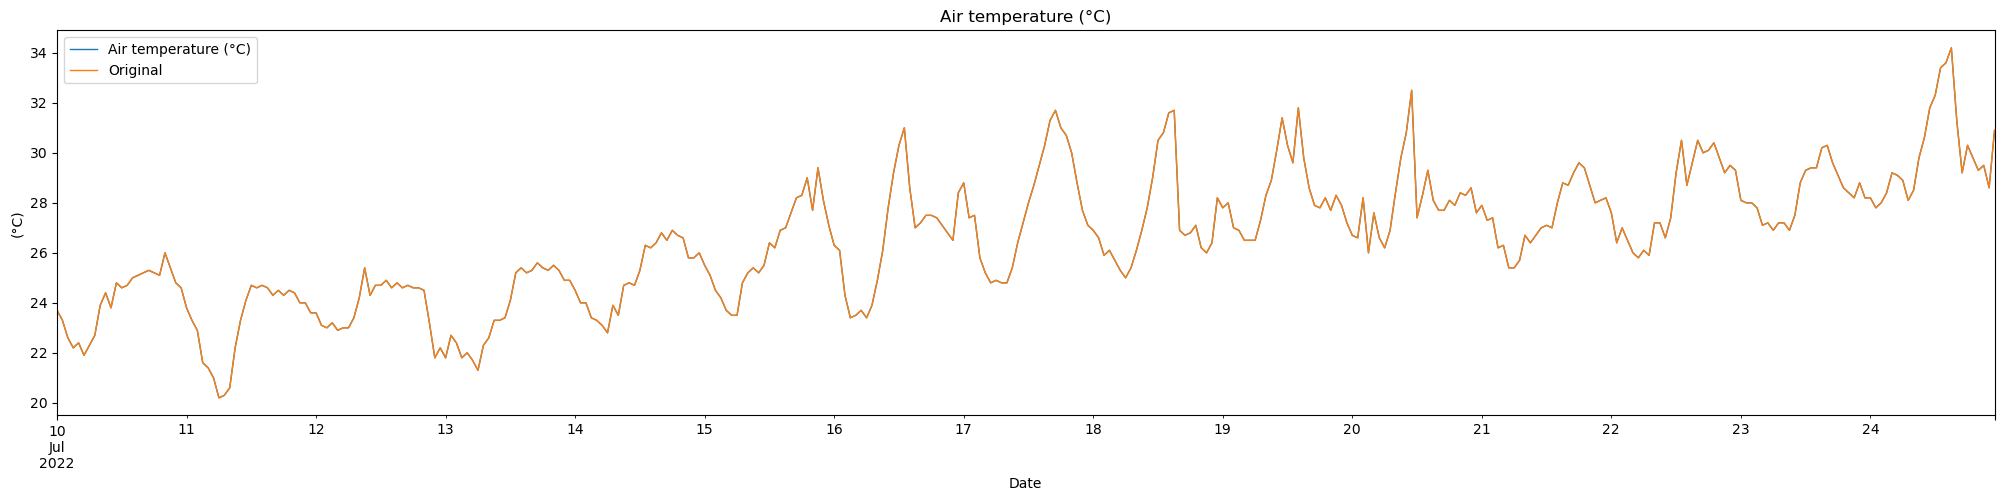

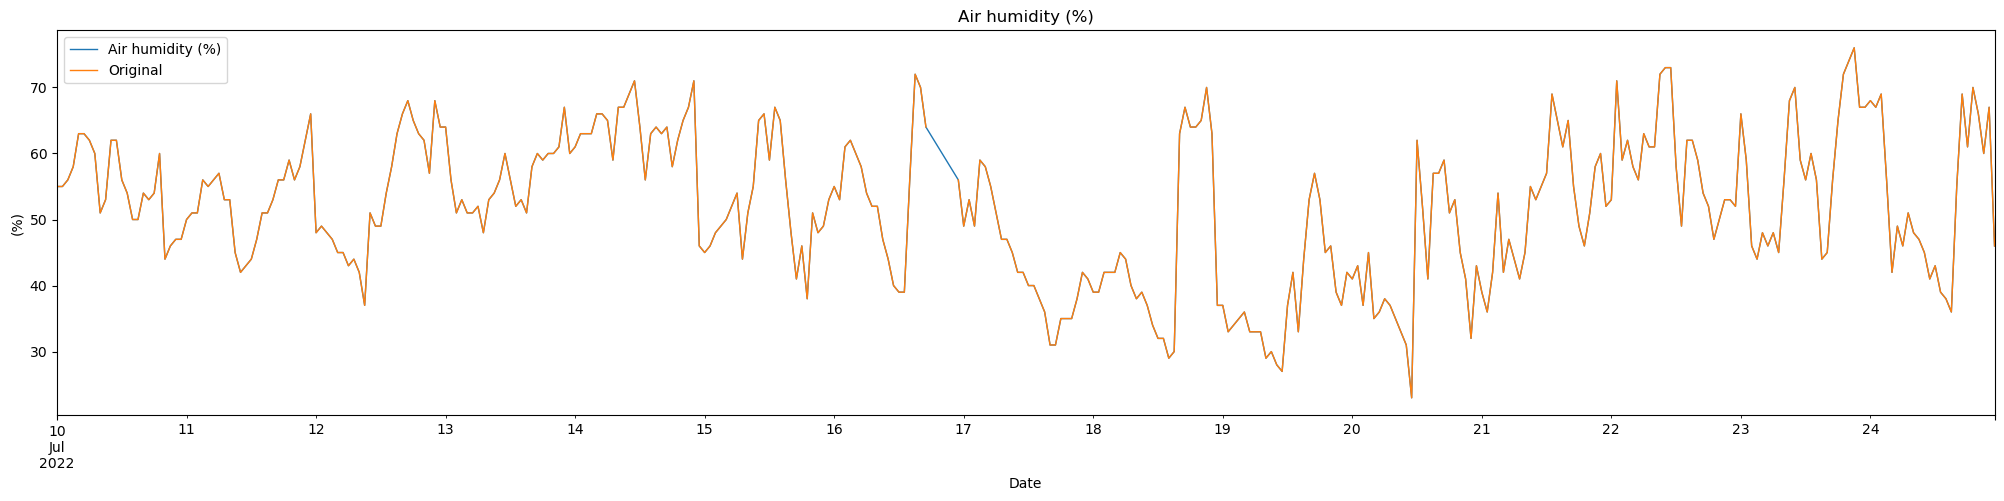

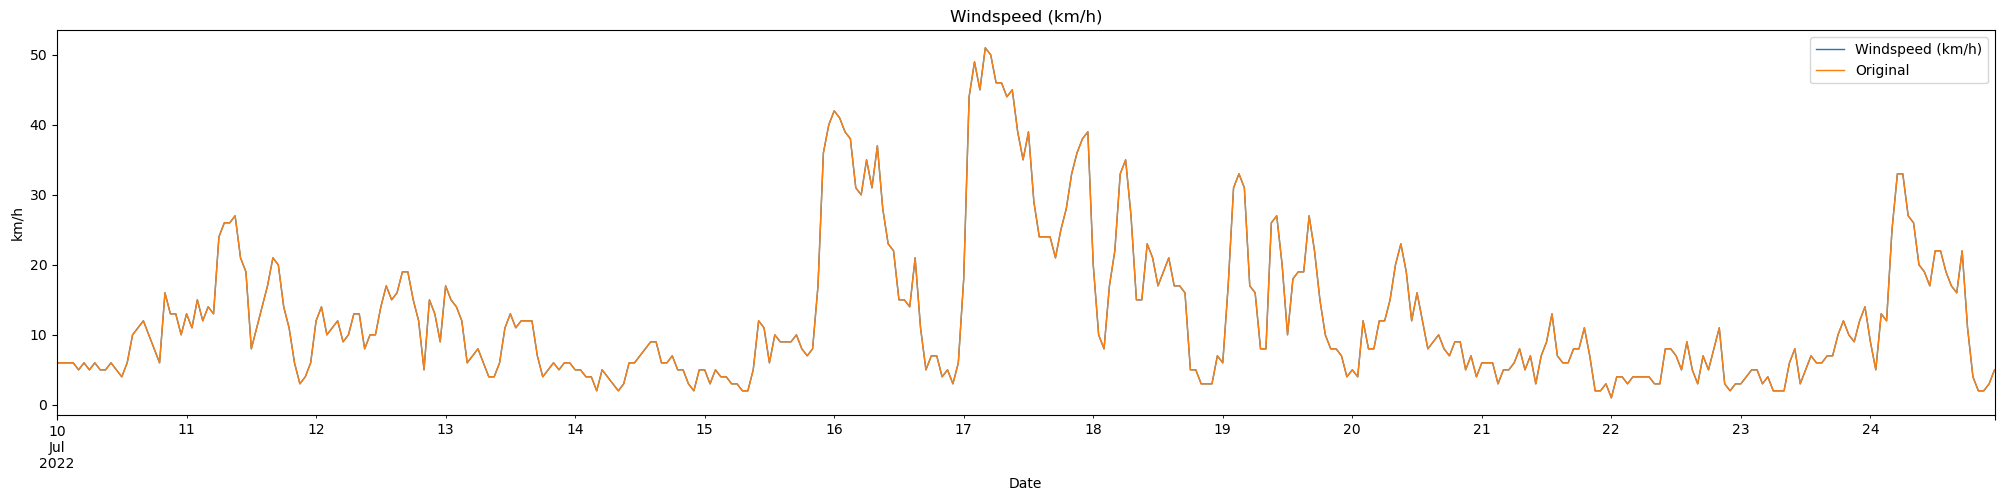

In [105]:
# reduce time series to specified start and end dates
tseriesX_df = weather_data[start:end].copy()

# fill missing values with interpolation technique
tseriesX_df.interpolate(limit_direction='both',inplace=True)

## visualize weather data

# RAINFALL
var = 'Rainfall depth (mm)'
fig, ax = plt.subplots()
tseriesX_df.plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1,label=var)
weather_data[start:end].plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
plt.title(var)
plt.xlabel("Date")
plt.ylabel("mm")
plt.legend()
plt.show()

# AIR TEMPERATURE
var = 'Air temperature (°C)'
fig, ax = plt.subplots()
tseriesX_df.plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1,label=var)
weather_data[start:end].plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
plt.title(var)
plt.xlabel("Date")
plt.ylabel("(°C)")
plt.legend()
plt.show()

# AIR HUMIDITY
var = 'Air humidity (%)'
fig, ax = plt.subplots()
tseriesX_df.plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1,label=var)
weather_data[start:end].plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
plt.title(var)
plt.xlabel("Date")
plt.ylabel("(%)")
plt.legend()
plt.show()

# WINDSPEED
var = 'Windspeed (km/h)'
fig, ax = plt.subplots()
tseriesX_df.plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1,label=var)
weather_data[start:end].plot(y=var,use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
plt.title(var)
plt.xlabel("Date")
plt.ylabel("km/h")
plt.legend()
plt.show()

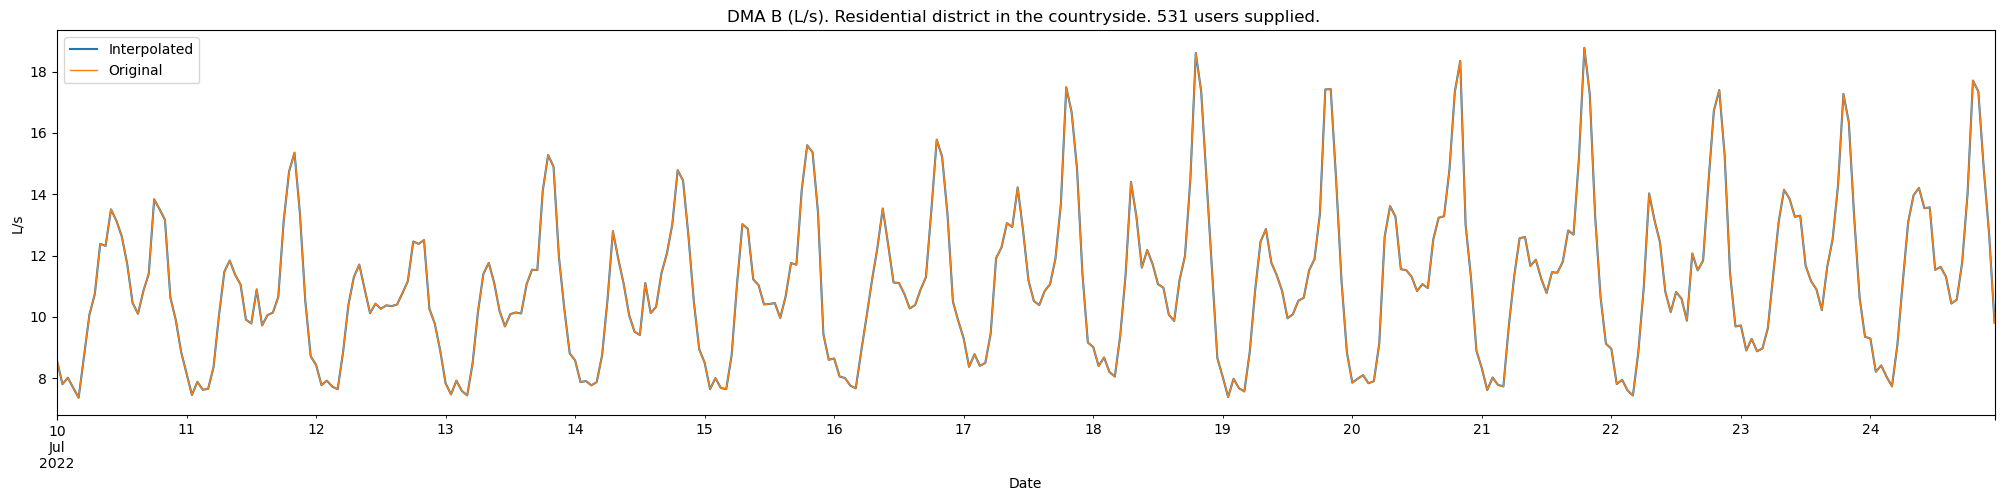

In [106]:
# select dma for analysis
dma = 'DMA B (L/s)'

# make dictionary with dma position in description list
dict_dma = dict(zip(dma_list, np.arange(0,len(dma_list))))

# copy data from dataframe in a new time series dataframe
tseries_df = inflow_data[dma][start:end].copy()

# fill missing values with interpolation technique
tseries_df.interpolate(limit_direction='both',inplace=True)

# plot original and interpolated time series for selected dma
fig, ax = plt.subplots()
tseries_df.plot(label='Interpolated')
inflow_data[dma][start:end].plot(y=dma_list[i],use_index=True,ax = ax,figsize=(25,5), linewidth=1, label='Original')
plt.title(dma_list[dict_dma[dma]] + ". " + dma_descripton[dict_dma[dma]] +". "+ str(users_supplied[dict_dma[dma]]) + " users supplied. ")
plt.xlabel("Date")
plt.ylabel("L/s")
plt.legend()
plt.show()

In [107]:
# imports for time series analysis
from statsmodels.tsa.seasonal import MSTL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# imports for time series forecasting
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import *
from sktime.forecasting.naive import NaiveForecaster

# create an utility metric function
def print_metrics(y_true, y_pred, model_name):
    mae_ = mean_absolute_error(y_true, y_pred)
    rmse_ = mean_squared_error(y_true, y_pred, square_root = True)
    mape_ = mean_absolute_percentage_error(y_true, y_pred)
    smape_ = mean_absolute_percentage_error(y_true, y_pred, symmetric = True)
    
    dict_ = {'MAE': mae_, 'RMSE': rmse_,
             'MAPE': mape_, 'SMAPE': smape_ }
    
    df = pd.DataFrame(dict_, index = [model_name])
    return(df.round(decimals = 2))

def print_performance_indicators(y_obs,y_pred):
    PI_1 = 1/24 * np.sum(np.abs(y_obs[0:24] - y_pred[0:24]))

    PI_2 = np.max(np.abs(y_obs - y_pred))

    PI_3 = 1/144 * np.sum(np.abs(y_obs[24:168] - y_pred[24:168]))

    print('Performance indicators')

    print(f"P1      P2      P3")
    print(f"{PI_1:{1}.{3}}  {PI_2:{1}.{3}}  {PI_3:{1}.{3}}  \n")

In [108]:
y = tseries_df
y_train, y_test = temporal_train_test_split(y, test_size = 168)

X = tseriesX_df
X_train, X_test = temporal_train_test_split(X, test_size=168)

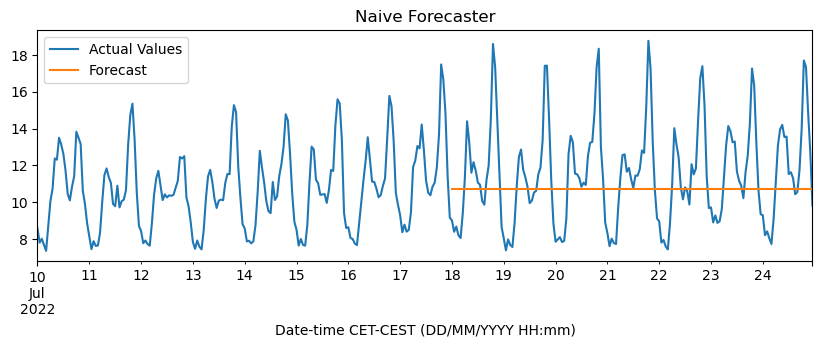

,MAE,RMSE,MAPE,SMAPE
Naive Forecaster,2.17,2.81,0.18,0.19


In [109]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy = 'mean')
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

fig, ax = plt.subplots(figsize = (10,3))
tseries_df.plot(title = 'Naive Forecaster', ax = ax)
y_pred.plot(ax = ax)
ax.legend(['Actual Values', 'Forecast'])
plt.show()

print_metrics(y_test, y_pred, 'Naive Forecaster')

In [110]:
print_performance_indicators(y_test,y_pred)

Performance indicators
P1      P2      P3
2.15  8.07  2.17  



In [111]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(y_train)
print(f'p-value: {adf_test[1]}')

p-value: 1.1083346321892646e-09


In [112]:
# y_train_diff = y_train.diff().dropna()
# y_train_diff.plot()

/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                        DMA B (L/s)   No. Observations:                  192
Model:             ARIMA(2, 0, 2)x(0, 1, [1], 24)   Log Likelihood                -158.256
Date:                            Tue, 05 Dec 2023   AIC                            336.511
Time:                                    12:07:42   BIC                            367.751
Sample:                                07-10-2022   HQIC                           349.190
                                     - 07-17-2022                                         
Covariance Type:                              opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Rainfall depth (mm)      1.8297      1.385      1.321      0.187      -0.886       4.545
Air t

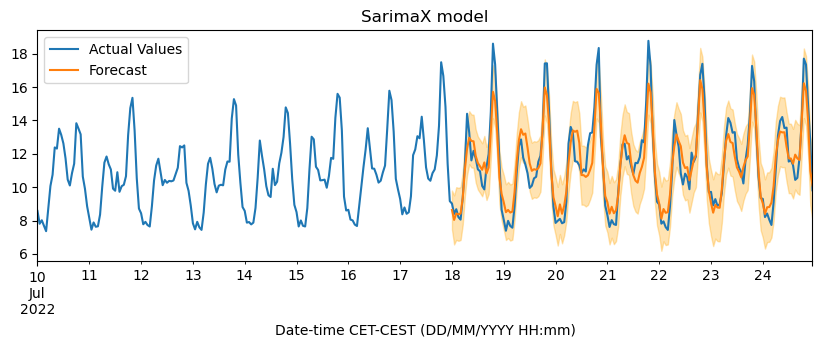

Performance indicators
P1      P2      P3
0.837  2.89  0.767  



In [113]:
# implement sarimaX model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, exog=X_train, order=(2,0,2), seasonal_order=(0,1,1,24))
model_fit = model.fit()
print(model_fit.summary())

# y_pred = model_fit.forecast(len(y_test), exog=X_test)

# fig, ax = plt.subplots(figsize = (10,3))
# tseries_df.plot(title = 'SarimaX model', ax = ax)
# y_pred.plot(ax = ax)
# ax.legend(['Actual Values', 'Forecast'])
# plt.show()
# print_metrics(y_test, y_pred, 'SarimaX forecaster')

y_pred = model_fit.get_forecast(len(y_test), exog=X_test).summary_frame(alpha=0.05)

fig, ax = plt.subplots(figsize = (10,3))
tseries_df.plot(title = 'SarimaX model', ax = ax)
y_pred.plot(y='mean',ax = ax)
ax.fill_between(y_pred.index, y_pred['mean_ci_lower'], y_pred['mean_ci_upper'],color='orange', alpha=0.3)
ax.legend(['Actual Values', 'Forecast'])
plt.show()

print_performance_indicators(y_test,y_pred['mean'])

/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.91243D-01    |proj g|=  3.61672D-01


 This problem is unconstrained.



At iterate    5    f=  8.63093D-01    |proj g|=  2.97675D-01

At iterate   10    f=  8.36483D-01    |proj g|=  1.84220D-02

At iterate   15    f=  8.35754D-01    |proj g|=  2.67499D-02

At iterate   20    f=  8.35324D-01    |proj g|=  9.26805D-02

At iterate   25    f=  8.35035D-01    |proj g|=  2.97885D-02

At iterate   30    f=  8.33074D-01    |proj g|=  3.11317D-02

At iterate   35    f=  8.25291D-01    |proj g|=  6.90034D-02

At iterate   40    f=  8.24341D-01    |proj g|=  1.28359D-02

At iterate   45    f=  8.24272D-01    |proj g|=  1.04955D-02

At iterate   50    f=  8.24249D-01    |proj g|=  3.19686D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                          DMA B (L/s)   No. Observations:                  192
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 24)   Log Likelihood                -158.256
Date:                              Tue, 05 Dec 2023   AIC                            336.511
Time:                                      12:08:02   BIC                            367.751
Sample:                                  07-10-2022   HQIC                           349.190
                                       - 07-17-2022                                         
Covariance Type:                                opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Rainfall depth (mm)      1.8297      1.385      1.321      0.187      -0.886  

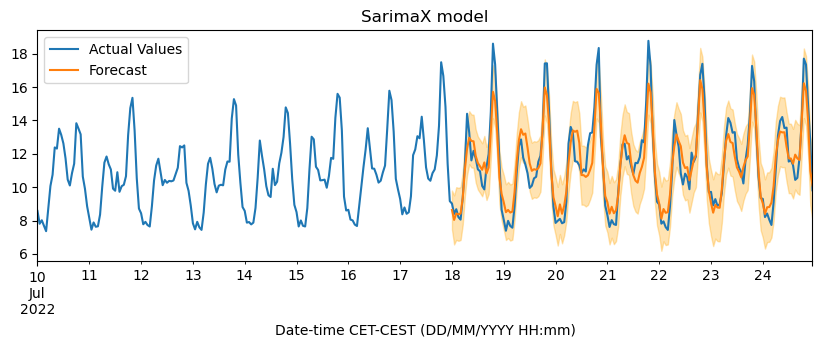

Performance indicators
P1      P2      P3
0.837  2.89  0.767  



In [116]:
## another SARIMAX implementation from statsmodels

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y_train, exog=X_train, order=(2,0,2), seasonal_order=(0,1,1,24))
model_fit = model.fit()
print(model_fit.summary())

y_pred = model_fit.get_forecast(len(y_test), exog=X_test).summary_frame(alpha=0.05)

fig, ax = plt.subplots(figsize = (10,3))
tseries_df.plot(title = 'SarimaX model', ax = ax)
y_pred.plot(y='mean',ax = ax)
ax.fill_between(y_pred.index, y_pred['mean_ci_lower'], y_pred['mean_ci_upper'],color='orange', alpha=0.3)
ax.legend(['Actual Values', 'Forecast'])
plt.show()

print_performance_indicators(y_test,y_pred['mean'])

In [117]:
## make weekened and holidays exogenous variable

tseriesX_df['weekend (0/1)'] = 0
tseriesX_df[0:24] = 1
tseriesX_df[144:192] = 1
tseriesX_df[312:360] = 1

X = tseriesX_df
X_train, X_test = temporal_train_test_split(X, test_size=168)

/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77613D-01    |proj g|=  6.71498D-01


 This problem is unconstrained.



At iterate    5    f=  8.57283D-01    |proj g|=  1.29013D-01

At iterate   10    f=  8.38283D-01    |proj g|=  1.48083D-01

At iterate   15    f=  8.37582D-01    |proj g|=  7.90636D-02

At iterate   20    f=  8.36983D-01    |proj g|=  2.39183D-02

At iterate   25    f=  8.36630D-01    |proj g|=  6.83055D-02

At iterate   30    f=  8.36327D-01    |proj g|=  4.26405D-02

At iterate   35    f=  8.35346D-01    |proj g|=  3.73453D-01

At iterate   40    f=  8.34620D-01    |proj g|=  2.20210D-02

At iterate   45    f=  8.33852D-01    |proj g|=  5.24094D-02

At iterate   50    f=  8.31551D-01    |proj g|=  5.91764D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/carlos/miniconda3/envs/water-demand-forecasting/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                          DMA B (L/s)   No. Observations:                  192
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 24)   Log Likelihood                -159.658
Date:                              Tue, 05 Dec 2023   AIC                            341.316
Time:                                      12:08:12   BIC                            375.679
Sample:                                  07-10-2022   HQIC                           355.262
                                       - 07-17-2022                                         
Covariance Type:                                opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Rainfall depth (mm)     -0.9506      1.174     -0.810      0.418      -3.251  

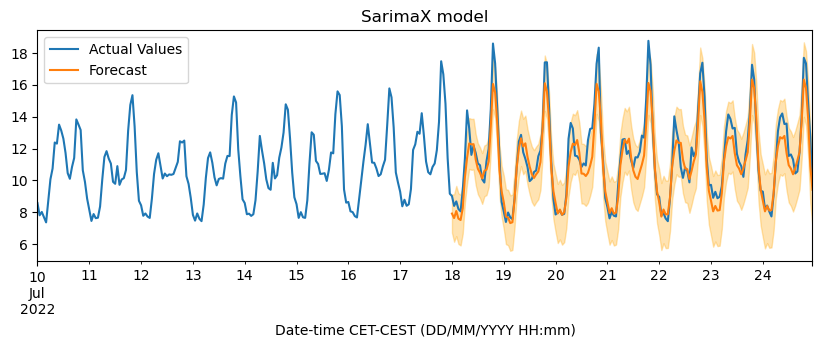

Performance indicators
P1      P2      P3
0.911  2.99  0.717  



In [118]:
# re-train sarimax model with new variable

model = SARIMAX(y_train, exog=X_train, order=(2,0,2), seasonal_order=(0,1,1,24))
model_fit = model.fit()
print(model_fit.summary())

y_pred = model_fit.get_forecast(len(y_test), exog=X_test).summary_frame(alpha=0.05)

fig, ax = plt.subplots(figsize = (10,3))
tseries_df.plot(title = 'SarimaX model', ax = ax)
y_pred.plot(y='mean',ax = ax)
ax.fill_between(y_pred.index, y_pred['mean_ci_lower'], y_pred['mean_ci_upper'],color='orange', alpha=0.3)
ax.legend(['Actual Values', 'Forecast'])
plt.show()

print_performance_indicators(y_test,y_pred['mean'])